# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

# Подготовка датасета

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
D_clients = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv')
D_close_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv')
D_job = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_job.csv')
D_last_credit = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv')
D_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv')
D_pens = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_pens.csv')
D_salary = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv')
D_target = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv')
D_work = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_work.csv')

In [26]:
df_list = [D_clients, D_close_loan, D_job, D_last_credit, D_loan, D_pens, D_salary, D_target, D_work]

In [27]:
for i in df_list:
  print(i.shape)
  print(i.columns)

(16000, 14)
Index(['ID', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO'],
      dtype='object')
(21126, 2)
Index(['ID_LOAN', 'CLOSED_FL'], dtype='object')
(15223, 5)
Index(['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'WORK_TIME', 'ID_CLIENT'], dtype='object')
(15223, 4)
Index(['CREDIT', 'TERM', 'FST_PAYMENT', 'ID_CLIENT'], dtype='object')
(21126, 2)
Index(['ID_LOAN', 'ID_CLIENT'], dtype='object')
(2, 3)
Index(['ID', 'FLAG', 'COMMENT'], dtype='object')
(15523, 3)
Index(['FAMILY_INCOME', 'PERSONAL_INCOME', 'ID_CLIENT'], dtype='object')
(15223, 3)
Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET'], dtype='object')
(3, 3)
Index(['ID', 'FLAG', 'COMMENT'], dtype='object')


In [28]:
D_job

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374
...,...,...,...,...,...
15218,Строительство,Специалист,Участие в основ. деятельности,48.0,106819588
15219,Здравоохранение,Другое,Участие в основ. деятельности,156.0,106819589
15220,Торговля,Служащий,Кадровая служба и секретариат,48.0,106819590
15221,NaN,NaN,NaN,NaN,106819591


In [29]:
D_clients.rename(columns={'ID': 'ID_CLIENT'}, inplace=True)

In [30]:
D_target.shape

(15223, 3)

In [31]:
df = D_target.merge(D_clients, how='inner', on='ID_CLIENT')
df = df.merge(D_job, how='inner', on='ID_CLIENT')
df = df.merge(D_salary, how='inner', on='ID_CLIENT')
df = df.merge(D_last_credit, how='inner', on='ID_CLIENT')
df = df.merge(D_loan, how='inner', on='ID_CLIENT')
df = df.merge(D_close_loan, how='inner', on='ID_LOAN')
df

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,...,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,ID_LOAN,CLOSED_FL
0,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,...,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0,8000.0,6,8650.0,1753790658,1
1,59910150,106804370,0,49,1,Среднее специальное,Состою в браке,2,1,1,...,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0,8000.0,6,8650.0,1753790658,1
2,59910230,106804371,0,32,1,Среднее,Состою в браке,3,3,1,...,Рабочий,Участие в основ. деятельности,97.0,от 10000 до 20000 руб.,12000.0,21650.0,6,4000.0,1753790659,1
3,59910525,106804372,0,52,1,Неполное среднее,Состою в браке,4,0,1,...,Специалист,Участие в основ. деятельности,84.0,от 10000 до 20000 руб.,9000.0,33126.0,12,4000.0,1753790660,1
4,59910525,106804372,0,52,1,Неполное среднее,Состою в браке,4,0,1,...,Специалист,Участие в основ. деятельности,84.0,от 10000 до 20000 руб.,9000.0,33126.0,12,4000.0,1753790661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21530,75291424,106819588,0,25,0,Среднее,Состою в браке,1,1,1,...,Специалист,Участие в основ. деятельности,48.0,от 10000 до 20000 руб.,12000.0,13450.0,10,1500.0,1753811779,1
21531,75291888,106819589,0,51,1,Среднее специальное,Состою в браке,2,0,1,...,Другое,Участие в основ. деятельности,156.0,от 20000 до 50000 руб.,10000.0,8991.0,6,4000.0,1753811780,0
21532,75291923,106819590,0,22,1,Среднее,Не состоял в браке,1,1,1,...,Служащий,Кадровая служба и секретариат,48.0,от 5000 до 10000 руб.,6000.0,2700.0,6,800.0,1753811781,0
21533,75291960,106819591,0,60,1,Среднее,Вдовец/Вдова,2,0,0,...,NaN,NaN,NaN,от 10000 до 20000 руб.,4500.0,24357.0,10,17930.0,1753811782,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21534
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGREEMENT_RK             21535 non-null  int64  
 1   ID_CLIENT                21535 non-null  int64  
 2   TARGET                   21535 non-null  int64  
 3   AGE                      21535 non-null  int64  
 4   GENDER                   21535 non-null  int64  
 5   EDUCATION                21535 non-null  object 
 6   MARITAL_STATUS           21535 non-null  object 
 7   CHILD_TOTAL              21535 non-null  int64  
 8   DEPENDANTS               21535 non-null  int64  
 9   SOCSTATUS_WORK_FL        21535 non-null  int64  
 10  SOCSTATUS_PENS_FL        21535 non-null  int64  
 11  REG_ADDRESS_PROVINCE     21535 non-null  object 
 12  FACT_ADDRESS_PROVINCE    21535 non-null  object 
 13  POSTAL_ADDRESS_PROVINCE  21535 non-null  object 
 14  FL_PRESENCE_FL        

In [33]:
df.describe()

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,ID_LOAN,CLOSED_FL
count,2.153500e+04,2.153500e+04,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,1.972700e+04,21535.000000,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000
mean,6.624482e+07,1.068129e+08,0.113350,40.559136,0.656373,1.119944,0.670490,0.915347,0.132946,0.326399,0.126956,2.327345e+02,13660.357303,14480.580095,8.089482,3306.251839,1.753801e+09,0.541769
std,4.690399e+06,4.347129e+03,0.317028,11.469235,0.474929,0.993785,0.815409,0.278371,0.339525,0.468906,0.333071,2.041913e+04,8487.810383,11869.287273,4.083532,4987.639151,6.102762e+03,0.498264
min,5.991015e+07,1.068044e+08,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,24.000000,2000.000000,3.000000,0.000000,1.753791e+09,0.000000
25%,6.218064e+07,1.068092e+08,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.400000e+01,8000.000000,6380.000000,6.000000,1000.000000,1.753796e+09,0.000000
50%,6.631800e+07,1.068139e+08,0.000000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+01,12000.000000,11362.000000,6.000000,2000.000000,1.753801e+09,1.000000
75%,6.723105e+07,1.068164e+08,0.000000,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.200000e+02,16000.000000,19000.000000,10.000000,4000.000000,1.753806e+09,1.000000
max,7.529224e+07,1.068196e+08,1.000000,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.867959e+06,250000.000000,119700.000000,36.000000,140000.000000,1.753812e+09,1.000000


In [34]:
df[df['GEN_INDUSTRY'].isna()]['ID_CLIENT']

24       106804386
37       106804399
49       106804410
53       106804413
65       106804423
           ...    
21482    106819555
21488    106819561
21498    106819566
21499    106819567
21533    106819591
Name: ID_CLIENT, Length: 1804, dtype: int64

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(21126, 27)

In [37]:
df.isna().sum()

AGREEMENT_RK                  0
ID_CLIENT                     0
TARGET                        0
AGE                           0
GENDER                        0
EDUCATION                     0
MARITAL_STATUS                0
CHILD_TOTAL                   0
DEPENDANTS                    0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
REG_ADDRESS_PROVINCE          0
FACT_ADDRESS_PROVINCE         0
POSTAL_ADDRESS_PROVINCE       0
FL_PRESENCE_FL                0
OWN_AUTO                      0
GEN_INDUSTRY               1763
GEN_TITLE                  1763
JOB_DIR                    1763
WORK_TIME                  1767
FAMILY_INCOME                 0
PERSONAL_INCOME               0
CREDIT                        0
TERM                          0
FST_PAYMENT                   0
ID_LOAN                       0
CLOSED_FL                     0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df['WORK_TIME'] = df['WORK_TIME'].apply(lambda x: np.log(x))

In [40]:
df.to_csv('./df.csv', index=False)

In [41]:
df.describe()

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,ID_LOAN,CLOSED_FL
count,1.935900e+04,1.935900e+04,19359.000000,19359.000000,19359.000000,19359.000000,19359.00000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,19359.000000,1.935900e+04,19359.000000
mean,6.622899e+07,1.068129e+08,0.120099,39.043339,0.643112,1.107960,0.71920,0.999225,0.053464,0.324707,0.134098,3.904289,14161.324620,14670.423249,8.111783,3367.670273,1.753801e+09,0.547859
std,4.654241e+06,4.330431e+03,0.325086,10.584393,0.479094,0.951569,0.82199,0.027826,0.224962,0.468277,0.340918,1.136313,8481.405437,12111.422236,4.156710,5108.256032,6.079747e+03,0.497717
min,5.991015e+07,1.068044e+08,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2000.000000,3.000000,0.000000,1.753791e+09,0.000000
25%,6.223314e+07,1.068092e+08,0.000000,30.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,3.178054,9000.000000,6375.000000,6.000000,1000.000000,1.753796e+09,0.000000
50%,6.632495e+07,1.068140e+08,0.000000,38.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,3.912023,12000.000000,11499.000000,6.000000,2000.000000,1.753801e+09,1.000000
75%,6.722369e+07,1.068163e+08,0.000000,47.000000,1.000000,2.000000,1.00000,1.000000,0.000000,1.000000,0.000000,4.787492,17000.000000,19416.000000,10.000000,4000.000000,1.753806e+09,1.000000
max,7.529224e+07,1.068196e+08,1.000000,67.000000,1.000000,10.000000,7.00000,1.000000,1.000000,1.000000,2.000000,14.869111,250000.000000,119700.000000,36.000000,140000.000000,1.753812e+09,1.000000


In [42]:
numerical = ['AGE',
             'WORK_TIME',
             'PERSONAL_INCOME',
             'CREDIT',
             'TERM',
             'FST_PAYMENT']


In [43]:
id_list = ['AGREEMENT_RK',
           'ID_CLIENT',
           'TARGET',
           'ID_LOAN']

In [44]:
cat = list(df.columns)
cat = list(set(cat) - set(numerical) - set(id_list))
cat

['GEN_TITLE',
 'FAMILY_INCOME',
 'OWN_AUTO',
 'GENDER',
 'SOCSTATUS_WORK_FL',
 'GEN_INDUSTRY',
 'FACT_ADDRESS_PROVINCE',
 'MARITAL_STATUS',
 'JOB_DIR',
 'REG_ADDRESS_PROVINCE',
 'CLOSED_FL',
 'EDUCATION',
 'POSTAL_ADDRESS_PROVINCE',
 'FL_PRESENCE_FL',
 'SOCSTATUS_PENS_FL',
 'DEPENDANTS',
 'CHILD_TOTAL']

In [53]:
glue = sns.load_dataset("glue")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


<AxesSubplot:>

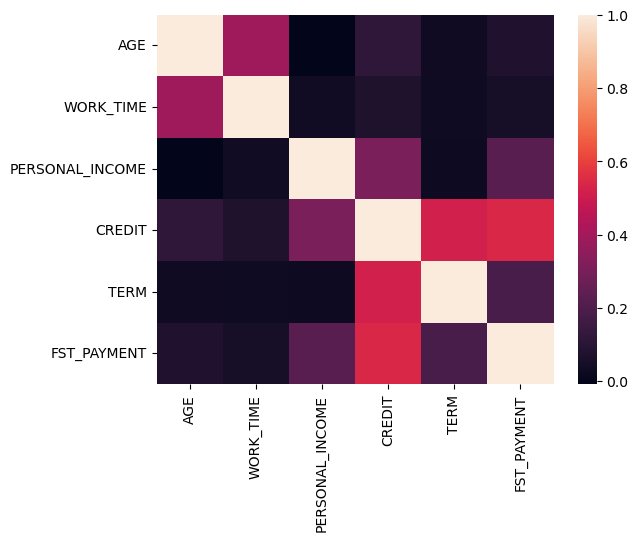

In [55]:
sns.heatmap(df[numerical].corr())